In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)


In [15]:
data = pd.read_csv('C:\\Users\\afsaa\\Desktop\\spotify_songs.csv')
data.head()

print("Shape of Dataset :",data.shape) 

Shape of Dataset : (32833, 23)


We have 32,833 Rows of Data across 23 features.

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32828 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32828 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32828 non-null  int64  
 4   track_album_id            32828 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32828 non-null  object 
 7   playlist_name             32828 non-null  object 
 8   playlist_id               32828 non-null  object 
 9   playlist_genre            32828 non-null  object 
 10  playlist_subgenre         32828 non-null  object 
 11  danceability              32828 non-null  float64
 12  energy                    32828 non-null  float64
 13  key                       32828 non-null  int64  
 14  loudness   

In [21]:
#check for missing values
data.isna().sum().sort_values(ascending=False)

track_id                    0
energy                      0
tempo                       0
valence                     0
liveness                    0
instrumentalness            0
acousticness                0
speechiness                 0
mode                        0
loudness                    0
key                         0
danceability                0
track_name                  0
playlist_subgenre           0
playlist_genre              0
playlist_id                 0
playlist_name               0
track_album_release_date    0
track_album_name            0
track_album_id              0
track_popularity            0
track_artist                0
duration_ms                 0
dtype: int64

In [22]:
#data discription
data.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000
mean,42.483551,0.654850,0.698603,5.373949,-6.719529,0.565737,0.107053,0.175352,0.084760,0.190175,0.510556,120.883642,225796.829779
std,24.980476,0.145092,0.180916,3.611572,2.988641,0.495667,0.101307,0.219644,0.224245,0.154313,0.233152,26.903632,59836.492346
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171250,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.961000,187804.500000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918250,253581.250000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [23]:
#check for duplicate rows of data
data.duplicated().any()

False

In [24]:
#check for Cardinality
data.nunique()

track_id                    28352
track_name                  23449
track_artist                10692
track_popularity              101
track_album_id              22543
track_album_name            19743
track_album_release_date     4529
playlist_name                 449
playlist_id                   471
playlist_genre                  6
playlist_subgenre              24
danceability                  822
energy                        952
key                            12
loudness                    10222
mode                            2
speechiness                  1270
acousticness                 3731
instrumentalness             4729
liveness                     1624
valence                      1362
tempo                       17682
duration_ms                 19782
dtype: int64

In [25]:
data.isna().sum().sort_values(ascending=False)

track_id                    0
energy                      0
tempo                       0
valence                     0
liveness                    0
instrumentalness            0
acousticness                0
speechiness                 0
mode                        0
loudness                    0
key                         0
danceability                0
track_name                  0
playlist_subgenre           0
playlist_genre              0
playlist_id                 0
playlist_name               0
track_album_release_date    0
track_album_name            0
track_album_id              0
track_popularity            0
track_artist                0
duration_ms                 0
dtype: int64

In [26]:
data[data['track_artist'].isna()==True]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms


In [27]:
cleaned_data = data.dropna()
cleaned_data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [28]:
cleaned_data.isna().any().sum()
cleaned_data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [29]:
cleaned_data.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

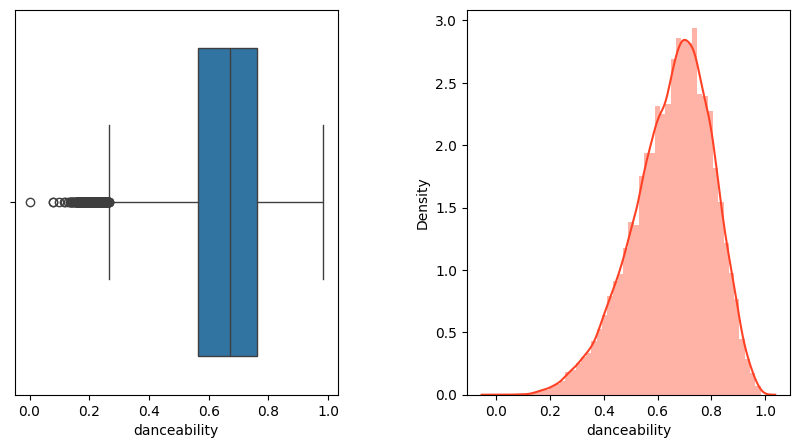

In [31]:
def plot(col):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'wspace': 0.4, 'hspace': 0.4})
    sns.boxplot(data=cleaned_data, x=col, ax=axes[0])
    sns.distplot(a=data[col], ax=axes[1], color='#ff4125')
    plt.show()
plot('danceability')

danceability feature has few outliers on the left side of the bell shaped curve. Most songs have a danceability value between 0.5 and 0.8. Few songs have 0 danceability value.

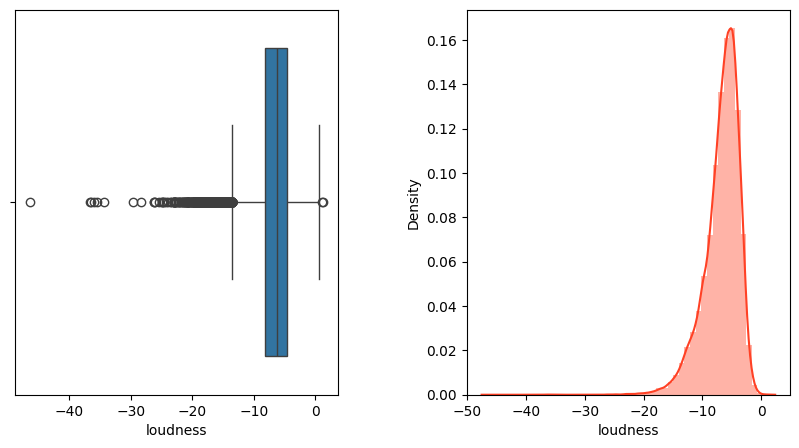

In [32]:
plot('loudness')

Most songs in the playlist have a loudness of -10 to 0 decibels. Few songs with less than -10 loudness.

Model R^2 Score: 0.27


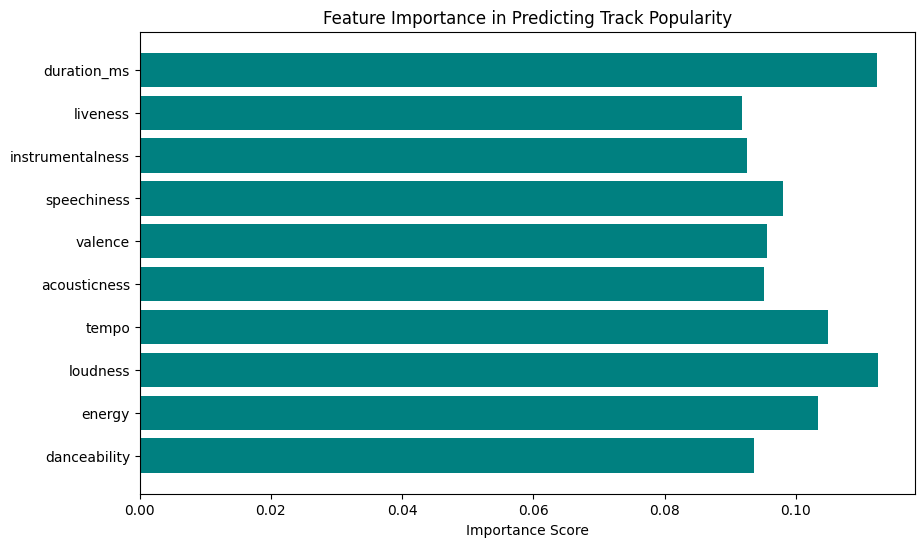

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Drop any remaining missing values
cleaned_data = cleaned_data.dropna()

# Select relevant features and target
X = cleaned_data[['danceability', 'energy', 'loudness', 'tempo', 'acousticness', 
                  'valence', 'speechiness', 'instrumentalness', 'liveness', 
                  'duration_ms']]
y = cleaned_data['track_popularity']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print(f"Model R^2 Score: {score:.2f}")

# Feature Importance
importance = model.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importance, color='teal')
plt.xlabel('Importance Score')
plt.title('Feature Importance in Predicting Track Popularity')
plt.show()


An R² score of 0.27 indicates that approximately 27% of the variance in track popularity can be explained by the features included in your model. While this score suggests a relationship between the input features and the target variable, it also implies that a significant portion of the variance, around 73%, remains unexplained. This modest predictive power highlights that the model does not capture many of the factors influencing track popularity, indicating that there may be other relevant features or external factors not accounted for in the analysis.

The score suggests considerable room for improvement in the model's performance. Enhancing the model could involve exploring additional features or engaging in feature engineering to better represent the underlying relationships in the data. Analyzing feature importance could provide insights into which features contribute most to the predictions. This analysis could help determine whether the current features are adequate or if there are other significant features to consider.

Implementing cross-validation can yield a more robust evaluation of the model’s performance. Cross-validation helps assess how well the model generalizes to unseen data, reducing the likelihood of overfitting or underfitting. It is also essential to examine the possibility of overfitting, especially if the training score significantly exceeds the testing score. In such cases, simplifying the model or employing regularization techniques may be beneficial.

In conclusion, while an R² score of 0.27 provides a starting point for understanding the model's effectiveness, further refinements and explorations are necessary to enhance its predictive accuracy regarding track popularity in your Spotify dataset. By addressing these aspects, you can work towards a more robust model that better reflects the complexities of music popularity.

In [18]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-Validated R^2 Score: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


Cross-Validated R^2 Score: 0.20 ± 0.07


track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object
Non-numeric columns: Index(['track_id', 'track_name', 'track_artist', 'track_album_id',
       'track_album_name', 'track_album_release_date', 'playlist_name'

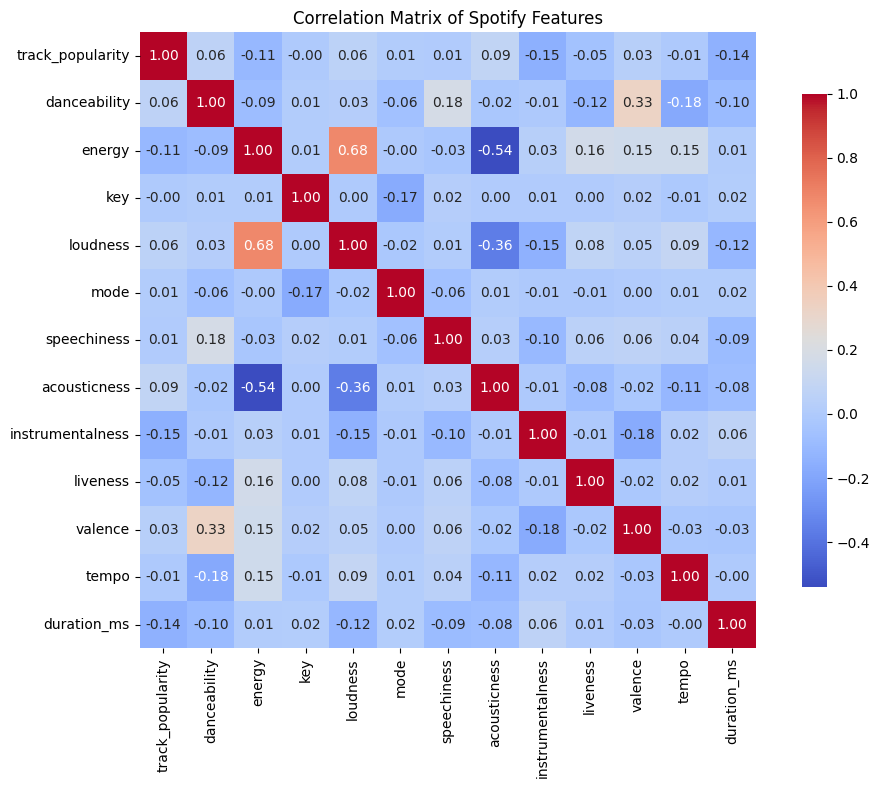

In [36]:
import pandas as pd

# Check the data types of each column
print(cleaned_data.dtypes)

# Identify non-numeric columns
non_numeric_columns = cleaned_data.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

# Drop non-numeric columns
cleaned_data_numeric = cleaned_data.drop(columns=non_numeric_columns)

# Now calculate the correlation matrix
correlation_matrix = cleaned_data_numeric.corr()

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Spotify Features')
plt.show()
